<a href="https://colab.research.google.com/github/AsmaaSobhyy/Book_Clustering/blob/main/Asmaa_Nlp_Book_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [32]:
import nltk
import requests 
from nltk.corpus import stopwords
import pandas as pd
import random
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.decomposition import PCA

In [2]:
import random
random.seed(0)

In [3]:
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('wordnet')
!pip install --upgrade gensim

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Requirement already up-to-date: gensim in /usr/local/lib/python3.7/dist-packages (4.0.1)


**a function that reads the book from gutenberg library and return it's text.**

In [4]:
def read_book(book_name):
    text = nltk.corpus.gutenberg.raw(book_name)
    return text

In [5]:
def read_from_url(url):
  response = requests.get(url)
  text=response.text.split('***')[2]
  return text

**tokinizing the text into a list of words, turning it to lower case and removing stop words.**<br>
*input : the text of the book<br>
output : a list of filtered words*

In [6]:
#tokinizing the words and removing all punctuation marks then changing it to lower case.
def filter_words(text):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    tokenized_words = tokenizer.tokenize(text)
    tokenized_words = [token.lower() for token in tokenized_words]
    stop_words=set(stopwords.words("english"))
    filtered_words=[]
    
    for w in tokenized_words:
        if w not in stop_words:
            filtered_words.append(w)
    return filtered_words

**Stemming and lemmatizing the text**<br>
*Stemming : coverting words like believing, believed, believes, and believe into believ*<br>
*Lemmatizing : coverting words into it's source, like better -> good*

In [7]:
def stem_words(filtered_words):
  ps = PorterStemmer()
  wl=WordNetLemmatizer()
  stemmed=[]
  for w in filtered_words:
    st=ps.stem(w)
    stemmed.append(wl.lemmatize(st))
  return stemmed


**appending each N words into a partition and labeling them with the book name.**<br>
*input : filtered_words, book_name and number of words*<br>
*output : dataframe of the document as text, tokinized document and label.*

In [8]:
#append each 100 word to a document and label them with the book's name then returns a dataframe
#assumption: i removed the final document to maintain 100 word/document.
def create_docs(filtered_words,book_name,n_words=100):
    labeled_docs=[]
    tokinized_docs=[]
    for i in range(int(len(filtered_words)/n_words)):
        tokinized_docs.append(filtered_words[i*n_words:i*n_words+n_words])
        doc = ' '.join(filtered_words[i*n_words:i*n_words+n_words])
        labeled_docs.append(doc)
    labeled_docs= pd.DataFrame({'Document': labeled_docs,'tokinized_doc':tokinized_docs,'label':book_name})
    return labeled_docs


**taking random samples from the labeled documents.**

In [9]:
# take  a random variable
def take_sample(labeled_docs, sample_size):
    samples=labeled_docs.sample(sample_size,random_state=0)
    return samples

**collecting final steps to the function 'sample_book' that takes the book name and sample size and return the final sampled dataframe.**

In [10]:
def sample_book(book_name,sample_size,url='',word_per_doc=100):
    if url=='':
      path=book_name+'.txt'
      text=read_book(path)
    else:
      text=read_from_url(url)
    filtered_words=filter_words(text)
    stemmed_words=stem_words(filtered_words)
    labeled_docs=create_docs(stemmed_words,book_name,word_per_doc)
    samples=take_sample(labeled_docs,sample_size)
    print(book_name)
    return samples


## Preparing model input
taking 200 sample from 5 books and appending them into 'samples',<br>
splitiing the data into features and labels, then splitting them into training set and testing set.

In [11]:
books_url=[('nihilism_Beyond Good and Evil','https://www.gutenberg.org/cache/epub/4363/pg4363.txt'),
           ('nihilism_The Joyful Wisdom','https://www.gutenberg.org/files/52881/52881-0.txt'),
           ('adventure_Scaramouche','https://www.gutenberg.org/files/1947/1947-0.txt'),
           ('adventure_The Three Musketeers','https://www.gutenberg.org/files/1257/1257-0.txt'),
           ('Artistic Anatomy of Animals','https://www.gutenberg.org/cache/epub/38315/pg38315.txt'),
           ('Legends of Babylon and Egypt in Relation','https://www.gutenberg.org/cache/epub/2030/pg2030.txt'),
           ('Commentaries on the Surgery of the War','https://www.gutenberg.org/files/65622/65622-0.txt'),
           ]
books_count=len(books_url)
samples=pd.DataFrame()

for book in books_url:
  samples=samples.append(sample_book(book[0],200,book[1],150))

samples=samples.reset_index()
samples=samples.drop(columns=['index'])

nihilism_Beyond Good and Evil
nihilism_The Joyful Wisdom
adventure_Scaramouche
adventure_The Three Musketeers
Artistic Anatomy of Animals
Legends of Babylon and Egypt in Relation
Commentaries on the Surgery of the War


In [12]:
samples

,Document,tokinized_doc,label
0,deck someth superior regular cult suffer unman...,"[deck, someth, superior, regular, cult, suffer...",nihilism_Beyond Good and Evil
1,disgrac child redound parent retro oper power ...,"[disgrac, child, redound, parent, retro, oper,...",nihilism_Beyond Good and Evil
2,woman give everyth perhap phantom wish first t...,"[woman, give, everyth, perhap, phantom, wish, ...",nihilism_Beyond Good and Evil
3,may suggest contrari problem race grant one kn...,"[may, suggest, contrari, problem, race, grant,...",nihilism_Beyond Good and Evil
4,thee carri thee away god conceal beneath idea ...,"[thee, carri, thee, away, god, conceal, beneat...",nihilism_Beyond Good and Evil
...,...,...,...
1395,absolut rest ordinari attent comfort necessari...,"[absolut, rest, ordinari, attent, comfort, nec...",Commentaries on the Surgery of the War
1396,pas across bone inch least trochant major turn...,"[pas, across, bone, inch, least, trochant, maj...",Commentaries on the Surgery of the War
1397,excis injur portion bone upper third middl bon...,"[excis, injur, portion, bone, upper, third, mi...",Commentaries on the Surgery of the War
1398,muscl show long head tricep outer edg second i...,"[muscl, show, long, head, tricep, outer, edg, ...",Commentaries on the Surgery of the War


In [13]:
features= np.array(samples['Document'])
labels=np.array(samples['label'])
print(len(features))

1400


## Word-Embedding 

In [14]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

#path = get_tmpfile("word2vec.model")
model = Word2Vec(samples['tokinized_doc'], vector_size=50, window=5, min_count=1, workers=4)
model.save("word2vec.model")

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [15]:
vec_doc=[]
for doc in samples['tokinized_doc']:
  vec_doc.append([model.wv[x] for x in doc])

In [16]:
np.array(vec_doc[0]).shape
# vec_doc[0]

(150, 50)

In [17]:
samples['w2v_doc']=vec_doc
samples['flat_w2v']=[ np.hstack(x) for x in vec_doc ]
samples.head(1)

,Document,tokinized_doc,label,w2v_doc,flat_w2v
0,deck someth superior regular cult suffer unman...,"[deck, someth, superior, regular, cult, suffer...",nihilism_Beyond Good and Evil,"[[0.08650459, 0.17249995, 0.06877769, 0.023227...","[0.08650459, 0.17249995, 0.06877769, 0.0232274..."


In [18]:
#shape of each w2v_doc record
print(np.array(samples['w2v_doc'][0]).shape)
np.array(samples['flat_w2v'][0]).shape

(150, 50)


(7500,)

In [19]:
#testing the model 
print(f"similarity between different books : {model.wv.n_similarity(samples['tokinized_doc'][0], samples['tokinized_doc'][1000])}")

similarity between different books : 0.9961649775505066


In [20]:
model.wv.most_similar('power', topn=10)

[('happi', 0.9995422959327698),
 ('divin', 0.9995266199111938),
 ('mankind', 0.999525785446167),
 ('german', 0.9994847774505615),
 ('express', 0.9994741678237915),
 ('knowledg', 0.9994706511497498),
 ('appear', 0.9994452595710754),
 ('alreadi', 0.9994313716888428),
 ('art', 0.9994233846664429),
 ('recogn', 0.9994123578071594)]

In [21]:
#cosine similarity
def cosine_sim (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]# only get the unique Maker_Model


In [22]:
print('top 5 similar words')
print(cosine_sim (model.wv,'power',samples['tokinized_doc'][1],150)[0:5])
print('least similar words')
print(cosine_sim (model.wv,'power',samples['tokinized_doc'][1],150)[-5:])

top 5 similar words
[('mankind', 0.99952567), ('knowledg', 0.9994706), ('precis', 0.99934185), ('self', 0.9992475), ('longer', 0.9992455)]
least similar words
[('portion', 0.82048684), ('redound', 0.80424035), ('retro', 0.8016983), ('waver', 0.78897315), ('anteced', 0.77443564)]


In [23]:
from scipy.spatial import distance
def cos_distance(A,B):
  Aflat = np.hstack(A)
  Bflat = np.hstack(B)
  return  distance.cosine(Aflat, Bflat)

In [24]:
print('Same doc')
print(cos_distance(samples['w2v_doc'][5],samples['w2v_doc'][50]))
print('Different docs')
print(cos_distance(samples['w2v_doc'][10],samples['w2v_doc'][1200]))

Same doc
0.34661418199539185
Different docs
0.40891188383102417


In [25]:
#converting the 2d array in flat_w2v into multiple features
train_df=pd.DataFrame(list(samples['flat_w2v']),columns=[str(x) for x in range(len(samples['flat_w2v'][0]))])
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7460,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.086505,0.172500,0.068778,0.023227,0.021192,-0.213578,-0.055316,0.202806,-0.095700,-0.159819,-0.116541,-0.147469,-0.065943,0.127463,-0.060018,0.062396,-0.053797,-0.009993,-0.109658,-0.078307,-0.005914,0.101260,0.088792,-0.089414,0.128944,-0.080227,-0.083902,0.006958,-0.034580,-0.002673,0.054093,-0.008549,-0.013897,-0.034244,-0.037440,0.200688,0.099395,-0.068027,0.085380,0.033993,...,-0.423275,-0.958554,-0.371534,0.952817,-0.422414,0.568676,-0.200344,-0.006440,-0.838672,-0.556211,0.114534,0.587046,0.574217,-0.511337,0.808646,-0.381760,-0.338342,0.020887,-0.240814,-0.031417,0.130255,0.080269,0.036397,-0.225742,-0.129970,1.013181,0.629543,-0.343399,0.728706,0.032689,0.905756,-1.480377,0.295072,-0.855243,1.348616,0.191545,-0.220224,-0.904074,-0.146642,0.481470
1,0.074812,0.108265,0.047398,0.015856,0.003908,-0.213652,-0.027525,0.141517,-0.046012,-0.108058,-0.054064,-0.117034,-0.027334,0.110983,-0.065831,0.085383,-0.038336,-0.015218,-0.096178,-0.059158,0.023200,0.086556,0.056651,-0.072472,0.108177,-0.038597,-0.052992,-0.018794,-0.021766,-0.009947,0.029342,-0.013229,0.001169,-0.049876,-0.002086,0.146129,0.075529,-0.057360,0.113421,0.007189,...,-0.536233,-0.970262,-0.367270,0.912558,-0.401146,0.524372,-0.307095,-0.091439,-0.805564,-0.542806,0.008903,0.604920,0.535773,-0.477089,0.778651,-0.407796,-0.455508,-0.008764,-0.161146,-0.057264,0.289332,0.014042,-0.036759,-0.209943,-0.145608,1.180838,0.717103,-0.389768,0.743550,0.143547,1.071057,-1.738412,0.310764,-0.835000,1.466011,0.216706,-0.208537,-1.139513,-0.222651,0.477044
2,0.393512,1.025547,0.368049,0.420401,-0.210808,-1.778226,0.014129,1.275545,-0.469985,-1.344413,-0.323801,-1.276540,-0.435632,1.197809,-0.582973,0.764477,-0.057101,0.134442,-1.071902,-0.686202,0.320062,0.776419,0.761440,-0.688139,1.135575,-0.400571,-0.350349,0.097070,-0.373293,-0.133774,-0.123666,0.154288,0.125586,-0.221704,-0.183691,1.089255,0.669397,-0.467327,1.028292,-0.011686,...,-0.517004,-0.960679,-0.388897,0.910699,-0.402086,0.556924,-0.231688,-0.021747,-0.833692,-0.535514,0.057252,0.606242,0.544037,-0.482010,0.773407,-0.353104,-0.412615,-0.001207,-0.167169,-0.084170,0.233047,0.053942,-0.026464,-0.235498,-0.113020,1.156531,0.682763,-0.361414,0.787080,0.078380,1.013272,-1.641669,0.342613,-0.877815,1.380892,0.215589,-0.212525,-0.984429,-0.221893,0.436432
3,0.498332,0.965242,0.391427,0.325917,-0.040467,-1.501547,-0.066074,1.303140,-0.404697,-1.039677,-0.502811,-1.135159,-0.457193,1.062586,-0.435821,0.597886,-0.102946,0.080703,-0.879816,-0.607053,0.168404,0.620442,0.664350,-0.533346,0.926220,-0.458777,-0.321824,-0.009276,-0.175083,-0.120854,-0.047823,0.141233,0.071028,-0.222153,-0.099978,1.062523,0.659657,-0.498085,0.884764,0.047031,...,-0.587109,-0.828923,-0.344253,0.843819,-0.312884,0.418030,-0.310005,-0.110201,-0.730350,-0.511002,-0.119939,0.516946,0.449498,-0.431242,0.655782,-0.404002,-0.437184,-0.078030,-0.087496,-0.044114,0.361387,-0.019947,-0.112433,-0.222133,-0.082832,1.192248,0.661812,-0.389723,0.632588,0.156661,1.014207,-1.696035,0.289336,-0.713407,1.381205,0.189479,-0.217679,-1.158681,-0.319132,0.401998
4,0.265416,0.463983,0.201198,0.063009,-0.001324,-0.731949,-0.117491,0.616729,-0.221685,-0.473075,-0.237680,-0.467832,-0.152798,0.459560,-0.212073,0.271467,-0.146343,-0.045950,-0.404715,-0.242144,0.018704,0.285585,0.267237,-0.239891,0.384624,-0.165765,-0.213394,-0.000161,-0.075330,-0.015169,0.108994,0.027750,0.004489,-0.117749,-0.071036,0.552483,0.344631,-0.169992,0.374901,0.057933,...,-0.445050,-0.729970,-0.331921,0.737269,-0.319924,0.416045,-0.231191,-0.057380,-0.643328,-0.453941,-0.011868,0.451363,0.416352,-0.401349,0.592398,-0.321247,-0.347453,-0.029017,-0.098109,-0.049790,0.233423,0.001911,

In [26]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 10,1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(train_df)
    wcss.append(kmeans.inertia_)


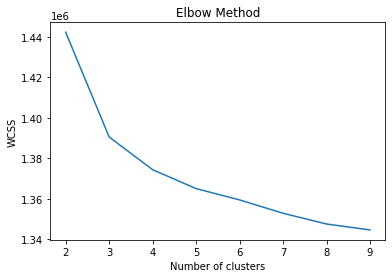

In [27]:
plt.plot(range(2, 10,1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(train_df)

In [29]:
#comparing output
y_df=pd.DataFrame({'y_actual':list(samples['label']),'y_pred':pred_y})
y_df.head()

,y_actual,y_pred
0,nihilism_Beyond Good and Evil,2
1,nihilism_Beyond Good and Evil,2
2,nihilism_Beyond Good and Evil,2
3,nihilism_Beyond Good and Evil,2
4,nihilism_Beyond Good and Evil,2


In [135]:
#trying 6 clusters for visualization
kmeans_6 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y_6 = kmeans_6.fit_predict(train_df)
y_df_6=pd.DataFrame({'y_actual':list(samples['label']),'y_pred':pred_y_6})
pca = PCA(n_components=2)
reduced_features_6 = pca.fit_transform(train_df)
reduced_cluster_centers_6 = pca.transform(kmeans_6.cluster_centers_)

In [136]:
#reducing the dimention to 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(train_df)
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

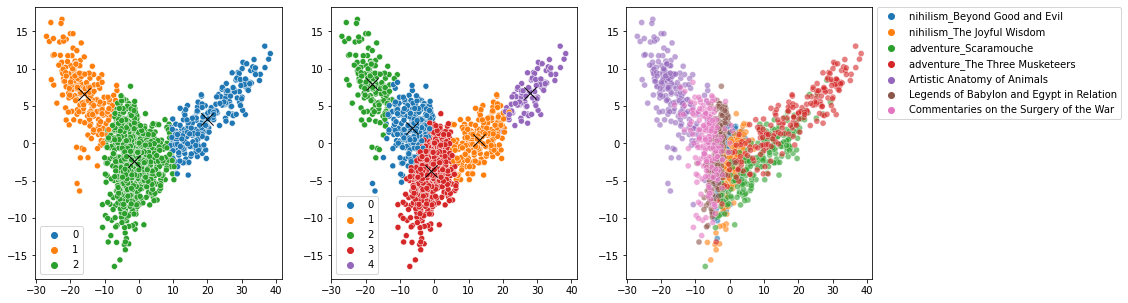

In [139]:
#
my_palette=sns.color_palette()
n_class=len(reduced_cluster_centers)
n2=len(reduced_cluster_centers_6)
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.scatterplot(reduced_features[:,0], reduced_features[:,1], hue=  y_df['y_pred'],palette=my_palette[:n_class],ax=axes[0])
sns.scatterplot(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, color='black',ax=axes[0])

sns.scatterplot(reduced_features[:,0], reduced_features[:,1], hue= y_df_6['y_pred'],palette=my_palette[:n2],ax=axes[1])
sns.scatterplot(reduced_cluster_centers_6[:, 0], reduced_cluster_centers_6[:,1], marker='x', s=150, color='black',ax=axes[1])

sns.scatterplot(reduced_features[:,0], reduced_features[:,1], hue = y_df['y_actual'],palette=my_palette[:books_count],ax=axes[2],alpha=0.6);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [36]:
y_df[y_df['y_pred']==0]['y_actual'].value_counts()


adventure_The Three Musketeers    151
adventure_Scaramouche              95
Name: y_actual, dtype: int64

In [37]:
y_df[y_df['y_pred']==1]['y_actual'].value_counts()

Artistic Anatomy of Animals               186
Commentaries on the Surgery of the War     34
Name: y_actual, dtype: int64

In [38]:
y_df[y_df['y_pred']==2]['y_actual'].value_counts()

nihilism_Beyond Good and Evil               200
nihilism_The Joyful Wisdom                  200
Legends of Babylon and Egypt in Relation    200
Commentaries on the Surgery of the War      166
adventure_Scaramouche                       105
adventure_The Three Musketeers               49
Artistic Anatomy of Animals                  14
Name: y_actual, dtype: int64

## LDA

In [96]:
from gensim.models import LdaMulticore
from gensim.corpora.dictionary import Dictionary
from gensim import corpora, models

# Create a corpus from a list of texts
dictionary = Dictionary(samples['tokinized_doc'])
#Filter out tokens that appear in less than 15 doc, or more than 50% in all docs and take top 10000 word
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=10000)
#doc to bow
bow_corpus = [dictionary.doc2bow(doc) for doc in samples['tokinized_doc']]
#apply tfidf # didn't change alot
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]


In [123]:
# Train the model on the bow corpus.
lda_model = LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=2, workers=2,random_state=0)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.111*"â" + 0.011*"said" + 0.009*"dâ" + 0.007*"artagnan" + 0.006*"de" + 0.006*"would" + 0.006*"man" + 0.005*"andr" + 0.005*"upon" + 0.005*"monsieur"
Topic: 1 
Words: 0.007*"may" + 0.006*"man" + 0.006*"â" + 0.005*"god" + 0.005*"even" + 0.005*"time" + 0.005*"also" + 0.004*"would" + 0.004*"part" + 0.004*"great"
Topic: 2 
Words: 0.012*"muscl" + 0.011*"â" + 0.008*"bone" + 0.007*"form" + 0.007*"part" + 0.007*"surfac" + 0.006*"two" + 0.006*"fig" + 0.006*"extern" + 0.006*"anterior"
Topic: 3 
Words: 0.007*"â" + 0.006*"wound" + 0.006*"may" + 0.005*"part" + 0.005*"man" + 0.005*"surfac" + 0.005*"side" + 0.005*"u" + 0.004*"bone" + 0.004*"form"


In [124]:
#testing record 1000 
for index, score in sorted(lda_model[bow_corpus[1000]], key=lambda tup: -1*tup[1]):
  print("topic {} \nScore: {}\t \nTopic: {} \n".format(index, score, lda_model.print_topic(index, 6)))

topic 1 
Score: 0.9940868020057678	 
Topic: 0.007*"may" + 0.006*"man" + 0.006*"â" + 0.005*"god" + 0.005*"even" + 0.005*"time" 



In [125]:
topic=[]
acc=[]
for doc in bow_corpus:
  t=sorted(lda_model[doc], key=lambda tup: -1*tup[1])[0]
  topic.append(t[0])
  acc.append(t[1])

In [126]:
Lda_df=pd.DataFrame({'y_actual':list(samples['label']),'topic':topic,'accuracy':acc})
Lda_df.head()

,y_actual,topic,accuracy
0,nihilism_Beyond Good and Evil,1,0.993472
1,nihilism_Beyond Good and Evil,1,0.993455
2,nihilism_Beyond Good and Evil,1,0.993502
3,nihilism_Beyond Good and Evil,1,0.992999
4,nihilism_Beyond Good and Evil,1,0.993233


In [127]:
Lda_df.describe()

,topic,accuracy
count,1400.000000,1400.000000
mean,1.098571,0.921870
std,0.970765,0.131355
min,0.000000,0.387974
25%,0.000000,0.909289
50%,1.000000,0.992994
75%,2.000000,0.993750
max,3.000000,0.994718


In [128]:
Lda_df[Lda_df['topic']==0]['y_actual'].value_counts()

adventure_The Three Musketeers    200
adventure_Scaramouche             197
nihilism_The Joyful Wisdom         22
nihilism_Beyond Good and Evil       3
Name: y_actual, dtype: int64

In [129]:
Lda_df[Lda_df['topic']==1]['y_actual'].value_counts()

nihilism_Beyond Good and Evil               197
Legends of Babylon and Egypt in Relation    181
nihilism_The Joyful Wisdom                  177
Commentaries on the Surgery of the War       32
Artistic Anatomy of Animals                   3
adventure_Scaramouche                         3
Name: y_actual, dtype: int64

In [130]:
Lda_df[Lda_df['topic']==2]['y_actual'].value_counts()

Artistic Anatomy of Animals                 189
Legends of Babylon and Egypt in Relation     17
Commentaries on the Surgery of the War        3
nihilism_The Joyful Wisdom                    1
Name: y_actual, dtype: int64

In [131]:
Lda_df[Lda_df['topic']==3]['y_actual'].value_counts()

Commentaries on the Surgery of the War      165
Artistic Anatomy of Animals                   8
Legends of Babylon and Egypt in Relation      2
Name: y_actual, dtype: int64

In [132]:
Lda_df[Lda_df['topic']==4]['y_actual'].value_counts()

Series([], Name: y_actual, dtype: int64)

In [133]:
pca = PCA(n_components=2,random_state=0)
reduced_features = pca.fit_transform(train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


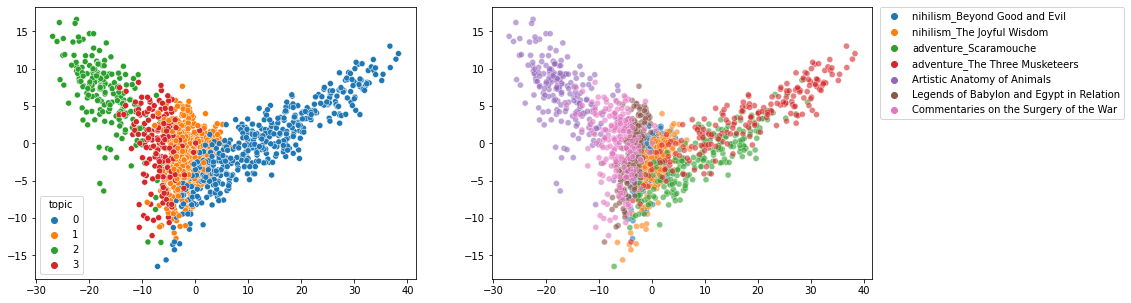

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.scatterplot(reduced_features[:,0], reduced_features[:,1], hue=  Lda_df['topic'],palette=my_palette[:4],ax=axes[0])

sns.scatterplot(reduced_features[:,0], reduced_features[:,1], hue = y_df['y_actual'],palette=my_palette[:books_count],ax=axes[1],alpha=0.6);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)